In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import datasist as ds
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [ ]:
df_train = pd.read_csv('titanic/train.csv')


In [192]:
# A picture is worth a thousand words, During the titanic sink , the third class seems to be the part that had sinked 
#the most ... followed by people in the third and second class.
#from the accident we can notice that the first half of the ship floated for sometime before sinking
#that means that we might have some first class & second class people to live while 
#the people in third class have low percentage to live because they were at a deep level in the water 
#unless they know how to swim 
#In this following lines , we will try to learn from the data more about what happened in the accident 
#and classify if a member has lived or not 


<img src="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w"/>

# Exploring Data

In [183]:
df_train.head(2)
#From the Kaggle Data , here is the summary 
#Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#survived :Survival (0 = No; 1 = Yes)
#name: Name (can be of diffrent Rank Mr/Mrs/Miss/Sir...etc)
#sex :Sex (male,female)
#age :Age (#number of months)
#sibsp :Number of Siblings/Spouses Aboard
#parch: Number of Parents/Children Aboard
#ticket: Ticket Number
#fare: Passenger Fare (British pound)
#cabin :Cabin
#embarked :Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [173]:
df_train.describe() #NO incorrect data found for the numerical data...

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Rank
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.774411
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.017629
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [174]:
df_train.info() 
#Sex is a String 
#Embarked is a String 
#null values at Age & Cabin, embarked ....


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Rank         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [154]:
#Another way to get the missing values 
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
cabinGroup     687
dtype: int64

In [155]:
#getting inconissitent values (if any) ... did not find any
df_train.nunique()
#sex male,female,0,1,m,f,M,F

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
cabinGroup       8
dtype: int64

In [159]:
#Another way to make sure there isn't inconssitant data 
#number of died > #Number of survived 
for col in df_train.columns:
    print(f'The column:{col}\nvalues_count:\n{df_train[col].value_counts()}\n\n')

The column:PassengerId
values_count:
891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64


The column:Survived
values_count:
0    549
1    342
Name: Survived, dtype: int64


The column:Pclass
values_count:
3    491
1    216
2    184
Name: Pclass, dtype: int64


The column:Name
values_count:
Lehmann, Miss. Bertha                                       1
Caldwell, Master. Alden Gates                               1
Daly, Mr. Eugene Patrick                                    1
Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)         1
Nye, Mrs. (Elizabeth Ramell)                                1
                                                           ..
Lindell, Mr. Edvard Bengtsson                               1
Harris, Mr. Henry Birkhardt                                 1
Theobald, Mr. Thomas Leonard                                1
Bissette, Miss. Amelia                                    

# outliers

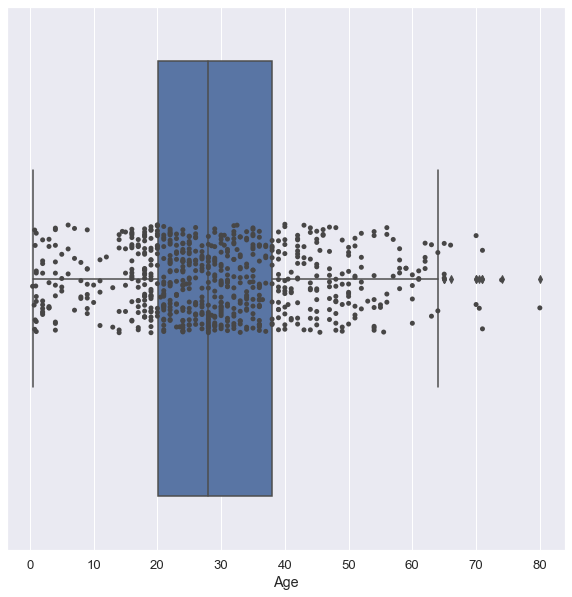

In [251]:
#getting outliers ..here are some outliers 
sns.boxplot(x='Age', data=df_train)
sns.stripplot(x='Age', data=df_train, color="#474646")

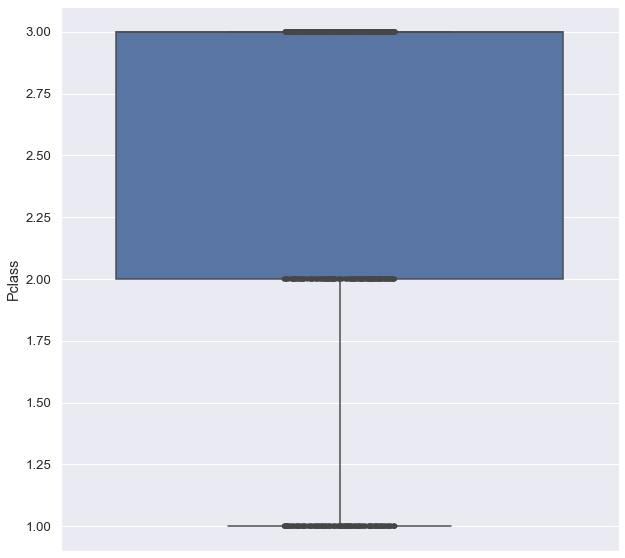

In [250]:
#no outliers here 
sns.boxplot(y='Pclass', data=df_train)
sns.stripplot(y='Pclass', data=df_train, color="#474646")

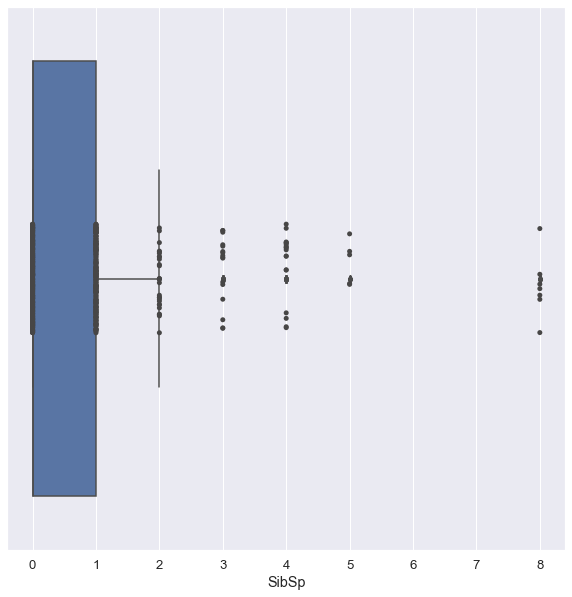

In [32]:
#getting outliers ..here are some natural outliers (we may not need to do processing to those)
sns.boxplot(x='SibSp', data=df_train)
sns.stripplot(x='SibSp', data=df_train, color="#474646")

In [39]:
#Getting the correlation
mycols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
my_df = df_train[mycols] #Fancy indexing.... I am doing that to get the correlation Only for those

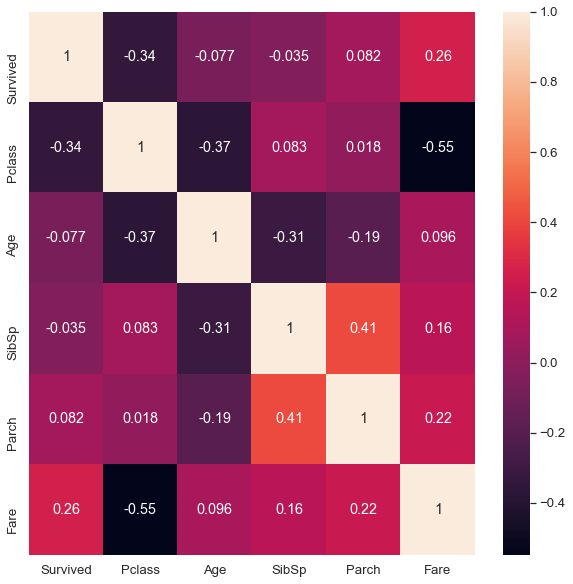

In [40]:
sns.heatmap(my_df.corr(),annot=True)
#Pclass & Fare : Have good Correlations
#Pclass & Survived : Maybe people who were high class was in a better place in the ship
#Pclass & Age : Have good Correlations
#Parch & Siblings Are not important...

# Some visualizations

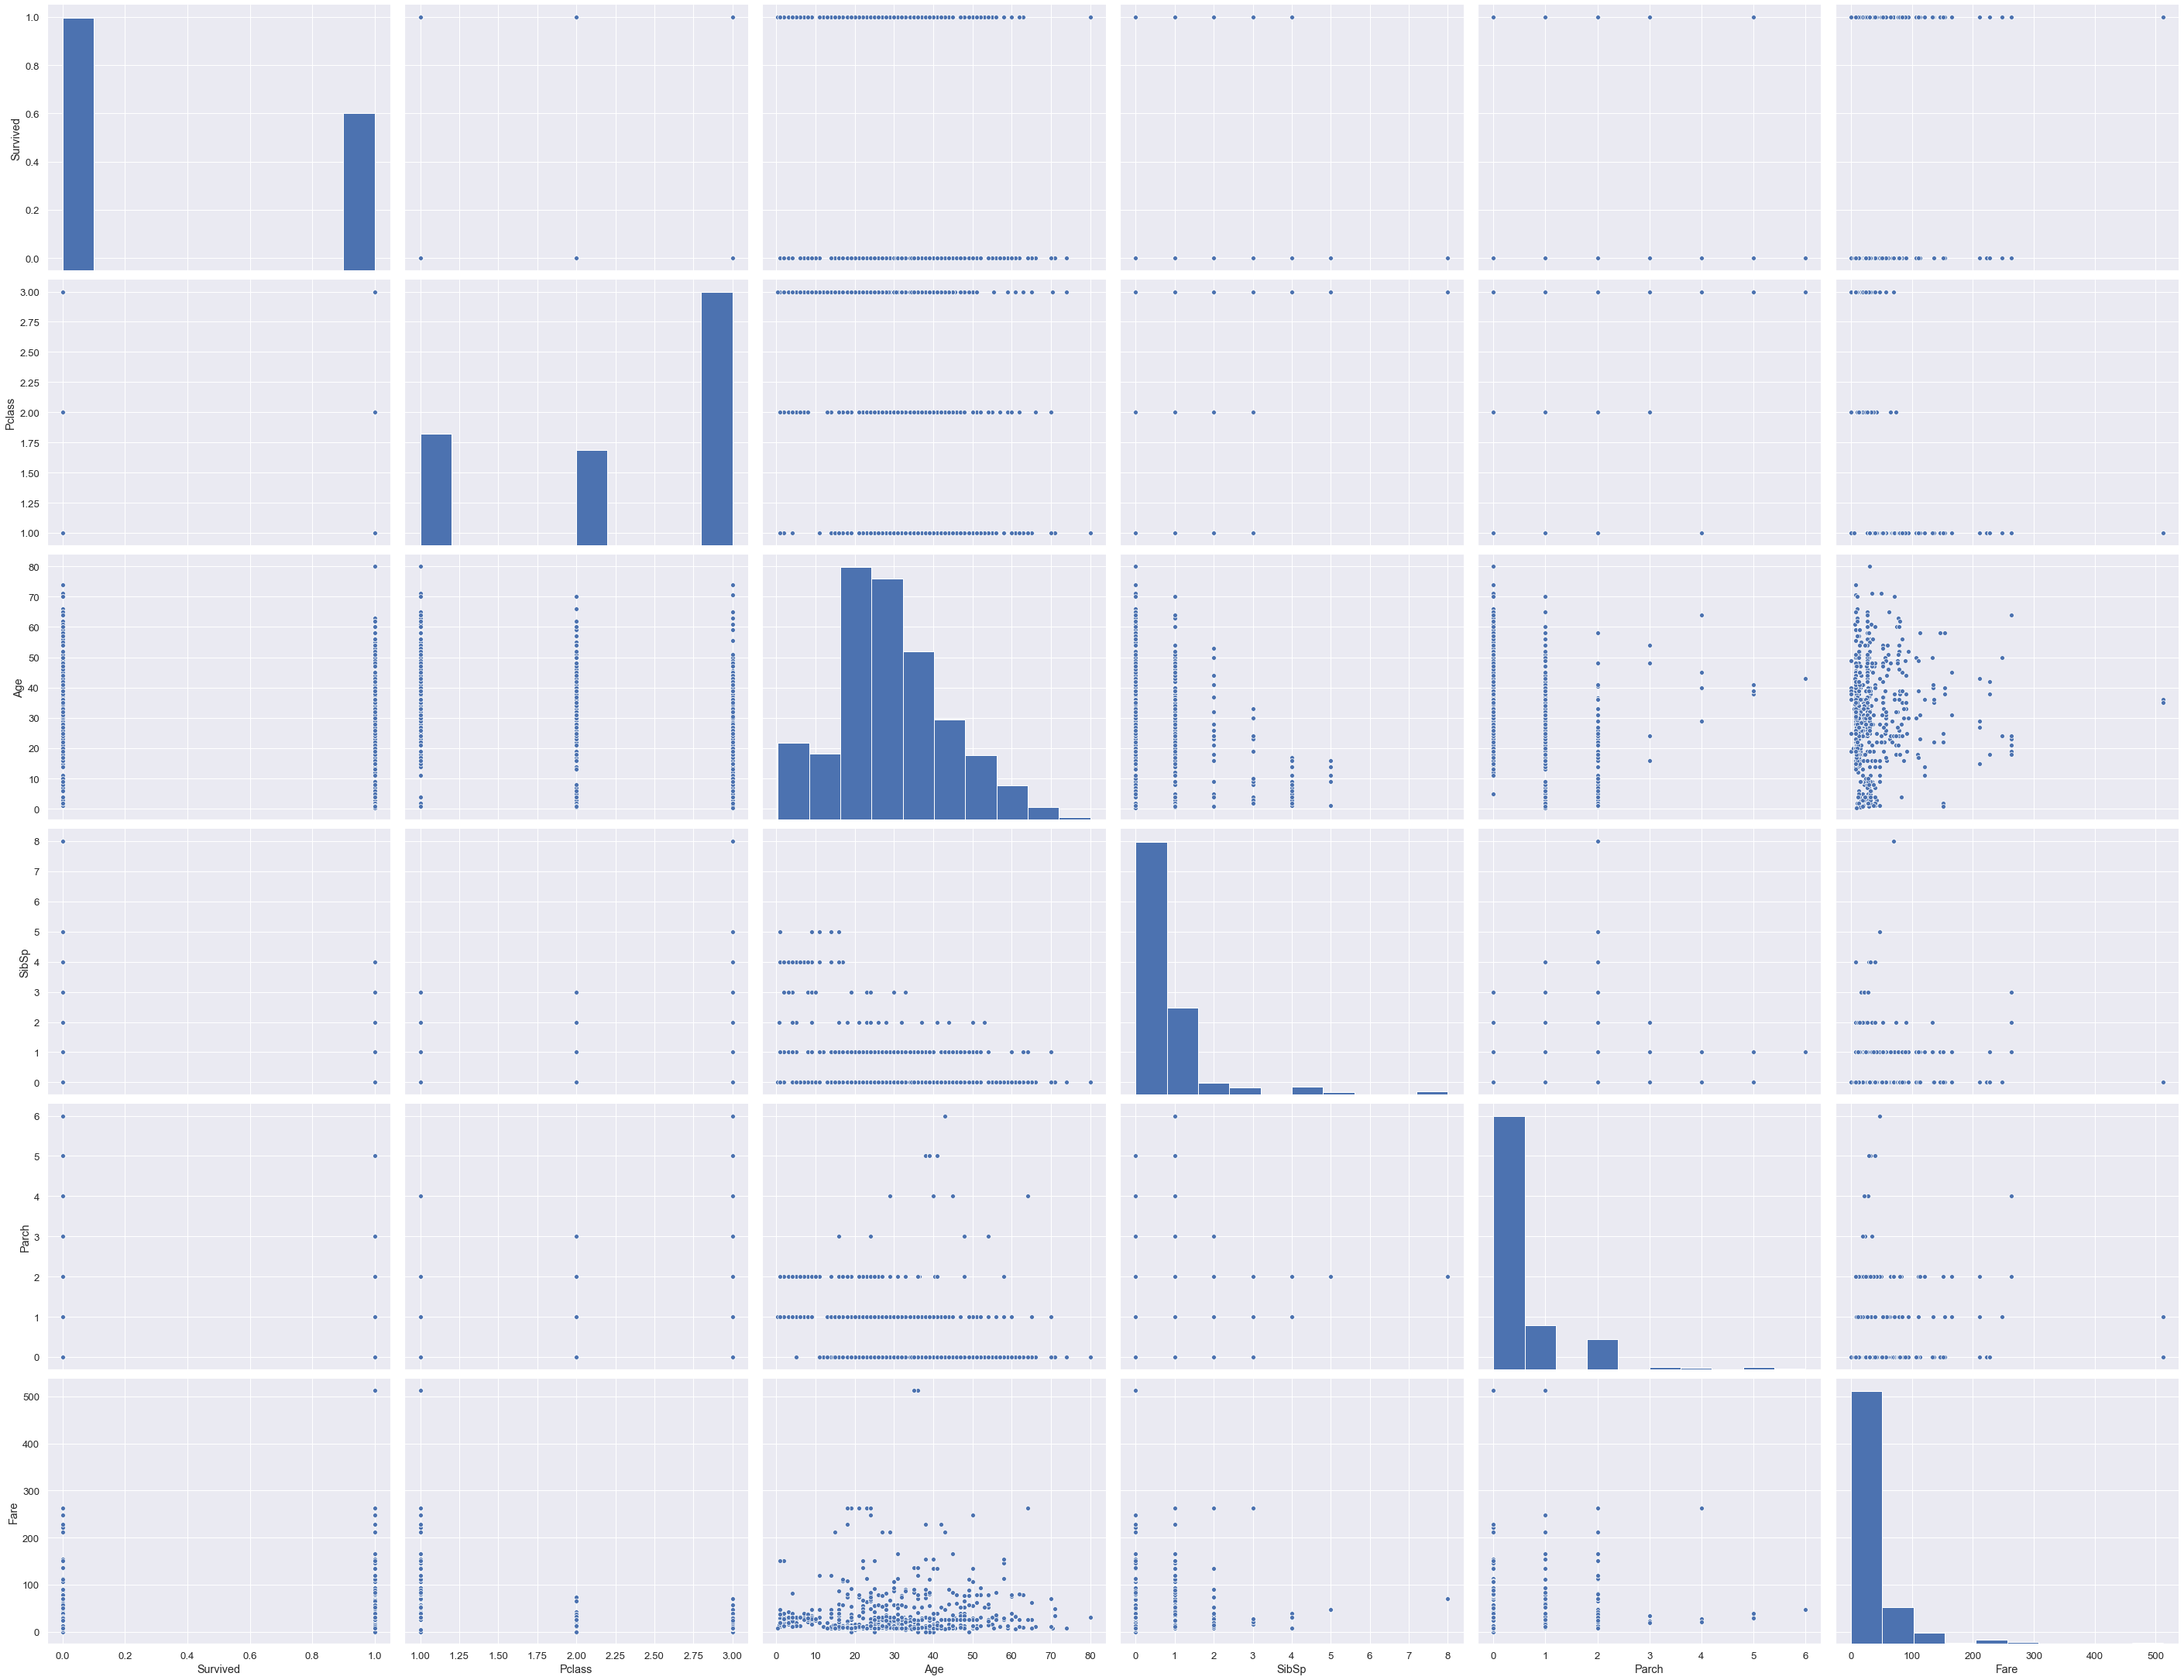

In [42]:
#paiplot 
#Getting the correlation
mycols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
my_df = df_train[mycols] #Fancy indexing.... I am doing that to plot Only for those

sns.pairplot(my_df, height=5, aspect=1.3)

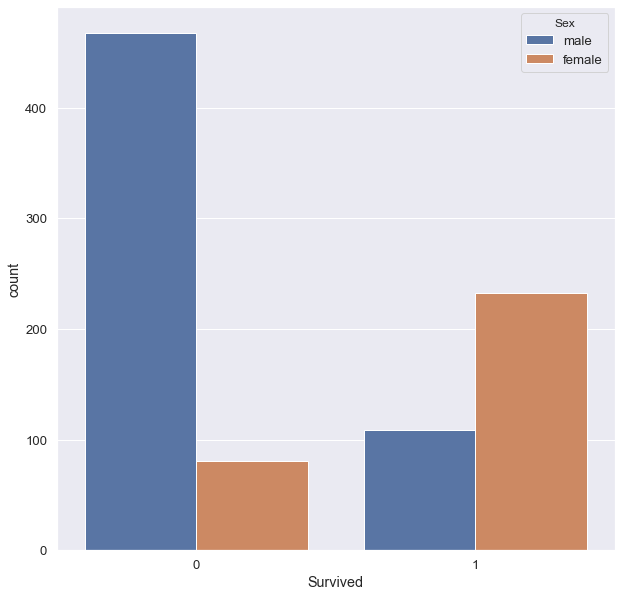

In [160]:
sns.countplot(x='Survived', hue='Sex' ,data=df_train)
#amount of died > amount of survived in the training set 
#number of survived female is more than # of survived men 
 

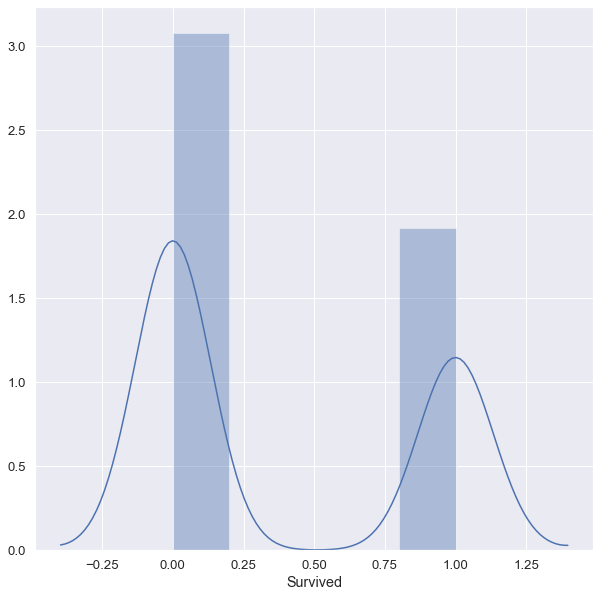

In [62]:
sns.distplot(df_train['Survived'])
#Here as well ... died > survived 

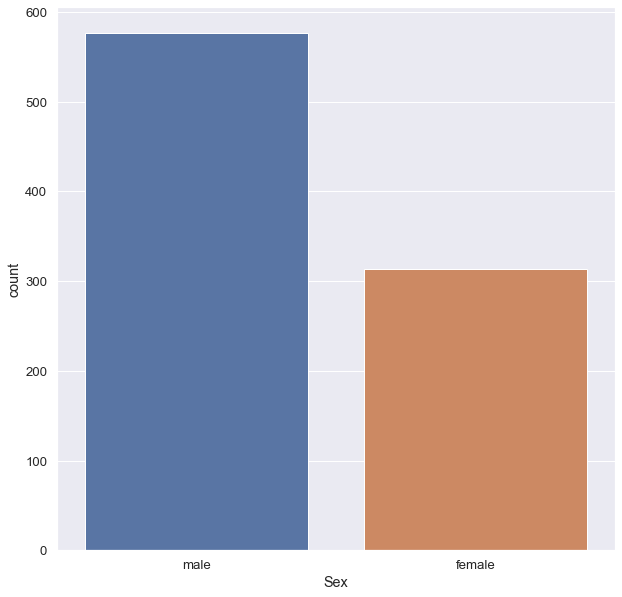

In [61]:
sns.countplot(df_train['Sex'])
#Amount  of male is more than Female 

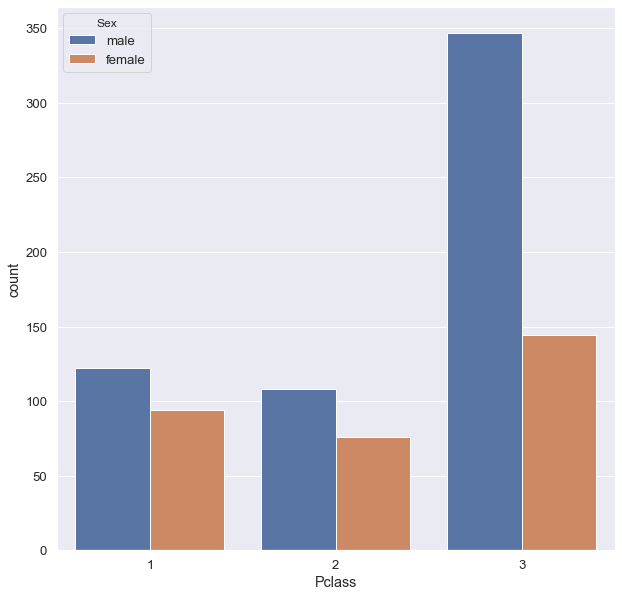

In [70]:
sns.countplot(x='Pclass', hue='Sex' ,data=df_train)
""" as we see , pclass=3 have alot of male , & we saw that many men were died. so we can say there might be a 
relation between pclass & survived
"""

#Astrocratic men Pclass=1 was higher than Astrocratic women
#overall , number of men > number of women 

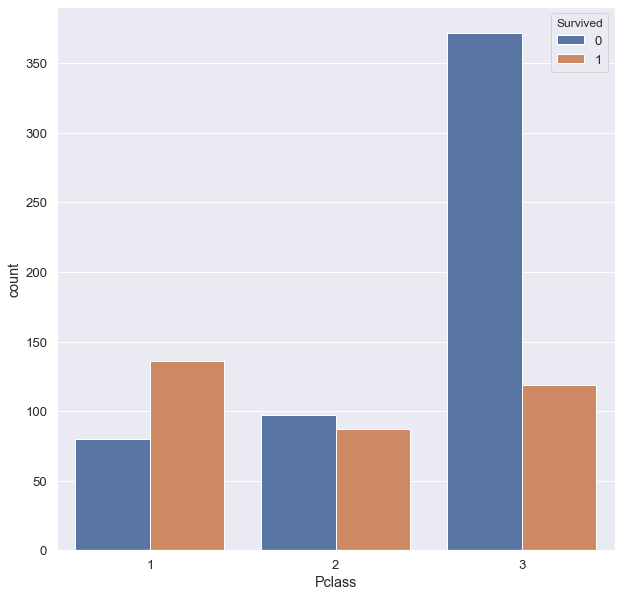

In [71]:
sns.countplot(x='Pclass', hue='Survived' ,data=df_train)
#as we can see pclass=3 , have many died people 
#pclass=2 have higher percentage of survived than died in relation to pclass=1 
#pclass=1 have more survived than died ... maybe people are of high rank?

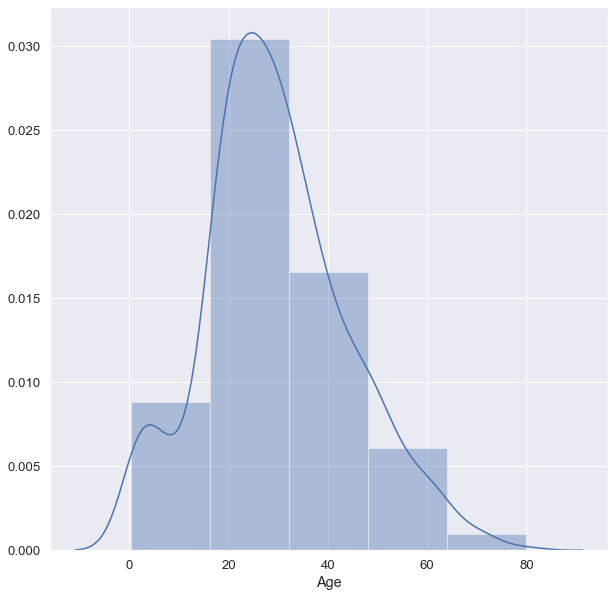

In [161]:
sns.distplot(df['Age'] ,bins=5,norm_hist=True)
#People 20-30 were the most in the training set 

In [353]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [184]:
#some temproary feature engineering 
#replace Name by Rank & count them 
#all_data.drop('Name',axis=1,inplace=True)
def extract_title(name):
    title= name.split(',')[1].split('.')[0]
    
    if (title.strip() == "Mr") :
        return 0 
    if (title.strip() == "Mrs") : 
        return 1 
    if (title.strip() == "Miss") :
        return 2
    else :
        return 3 #none of the above  
    
df_train['Rank'] =  df_train['Name'].apply(extract_title)


In [185]:
df_train['Rank'] = pd.to_numeric(df_train['Rank'])

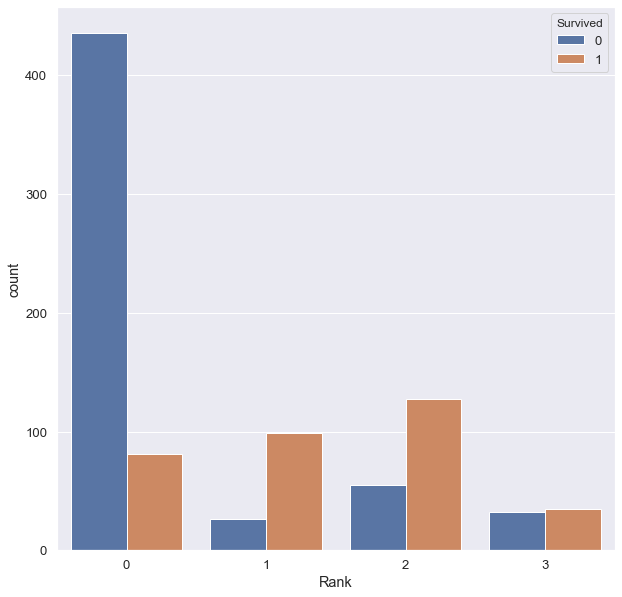

In [170]:
sns.countplot(x='Rank',hue='Survived' ,data=df_train)
#Using the Names. we can see that most of the dead people are from Mr Rank (Normal guys)
#Having a specfic title can impact with correlation 


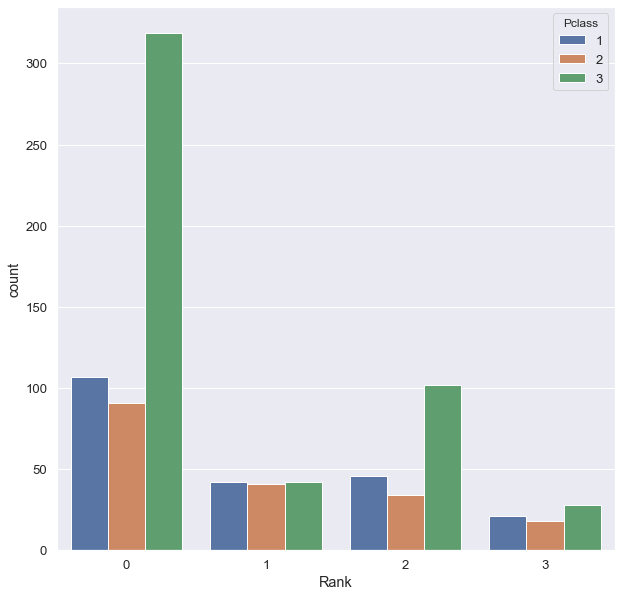

In [171]:
sns.countplot(x='Rank',hue='Pclass' ,data=df_train)
#Pclass=1 have the most amount of people , some of (Rank=Mr) was in the first class which is weird 
#as expected the other rank were the fewest 
#Poor women was less than poor men which is expected as well

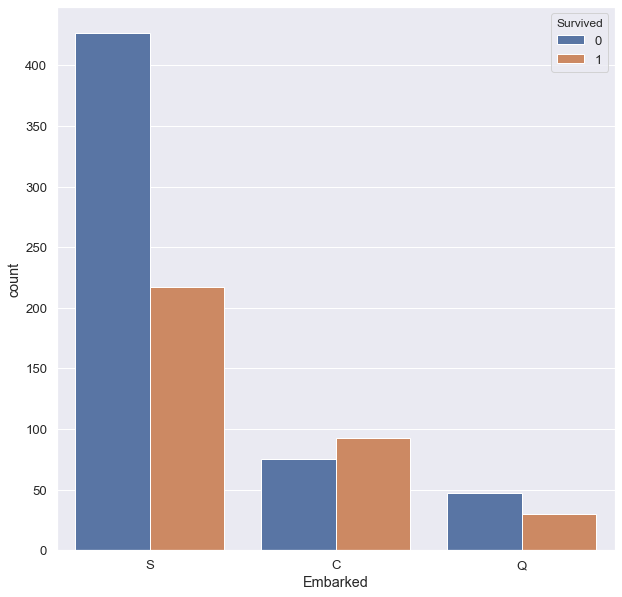

In [111]:
sns.countplot(x='Embarked', hue='Survived' ,data=df_train)
#people embarked from S was the highest to survive.
#however this does not make any relations because embarking is just the position of where they ride from

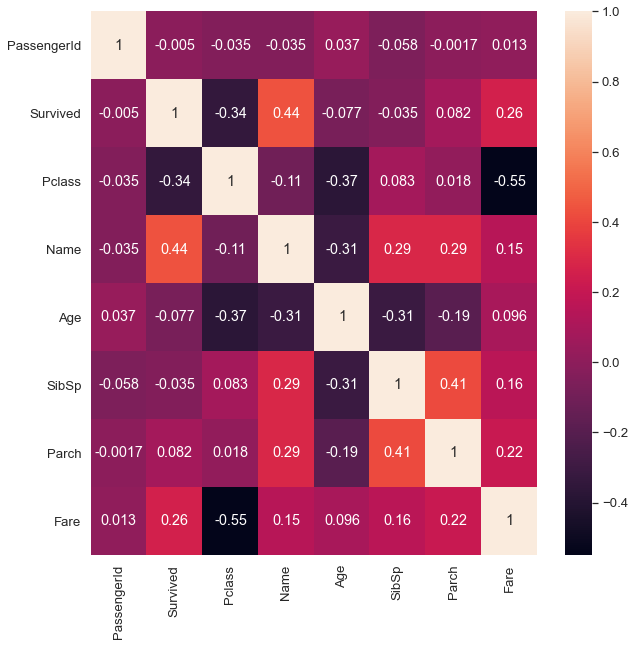

In [110]:
sns.heatmap(df_train.corr(),annot=True)
#Survived with Name now has a correlation with survived 
#pclass with fare

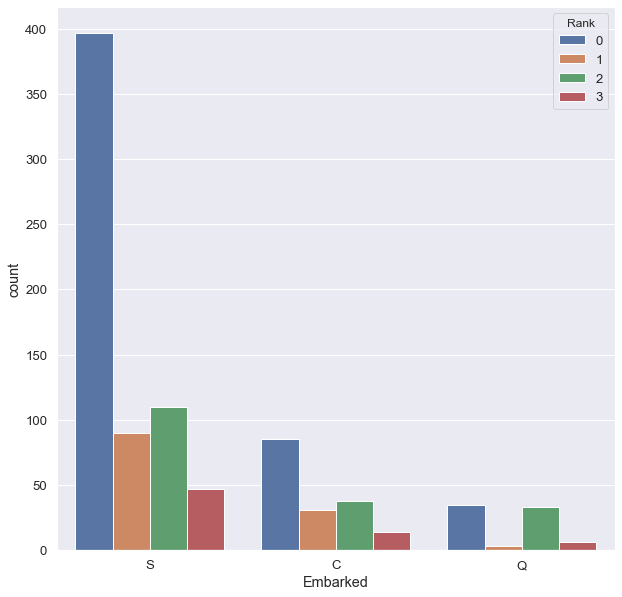

In [175]:
sns.countplot(x='Embarked', hue='Rank' ,data=df_train)
#Most normal people (Mr rank) where embarked from S 
#Most rich people embarked from S 
#we can see as well that the wealthy people is of small percentage 

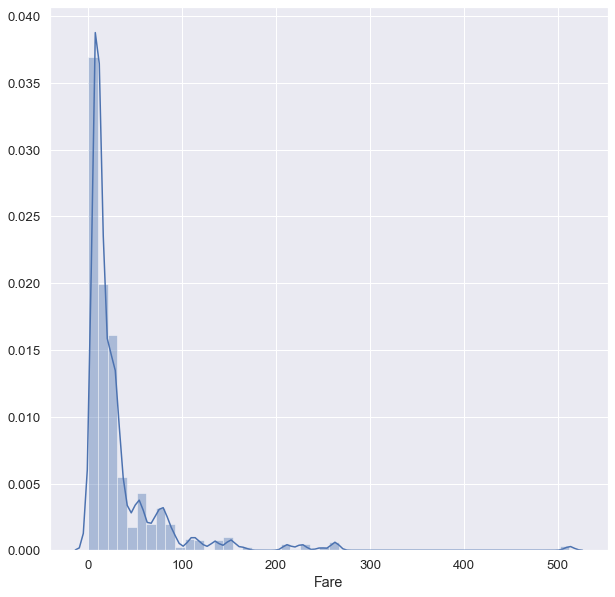

In [118]:
sns.distplot(df['Fare'] ,bins=50)
#Very high percentage of people almost didnot pay anything 
#Also one observation that we can use later on (we can do binning for that 0-50 50-100)

In [124]:
mycols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
my_df = df_train[mycols] 

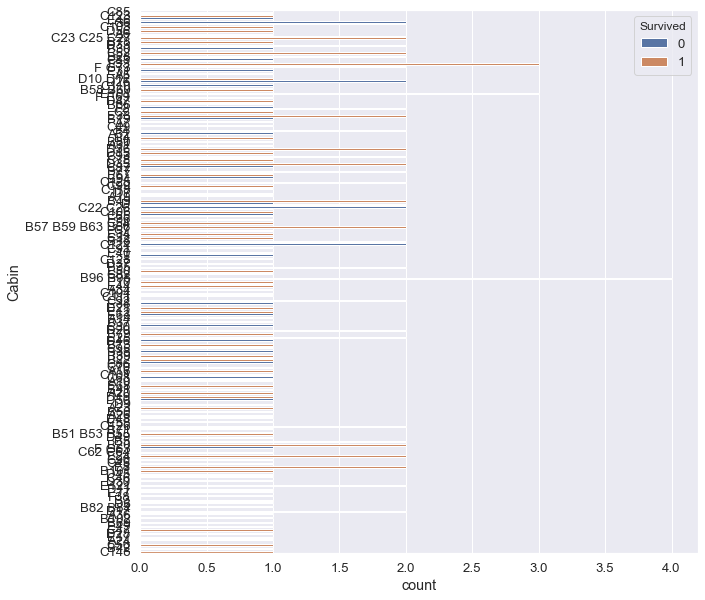

In [207]:
sns.countplot(y='Cabin',dodge=True,hue="Survived" ,data=my_df)
#Not visible , will try to group them by first letter 

In [209]:
#Let's group by first letter 
def groupCabins(cabin):
    if(pd.notnull(cabin)):
        return cabin[0]
    else:
        return "U" #for Unknown 

df_train['CabinGroup'] = df_train['Cabin'].apply(groupCabins)
    

In [204]:
#Converting to a string so that later on we can do the [0] indexing 
#df_train['CabinGroup'] = df_train['Cabin']+" "

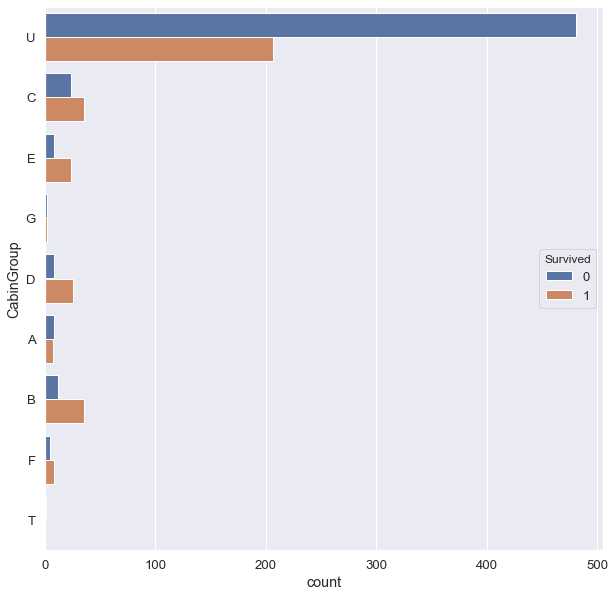

In [210]:
sns.countplot(y='CabinGroup',dodge=True,hue="Survived" ,data=df_train)
#Most Survived were from C,B,E,D maybe that means those specfic place in the ship was maybe on top
#Many people were not identified to be from which cabin 
#B&C as the letter sequence suggest might be near each other
#But we should note that those are not all values as there are some null values 
#possibility to remove the column 

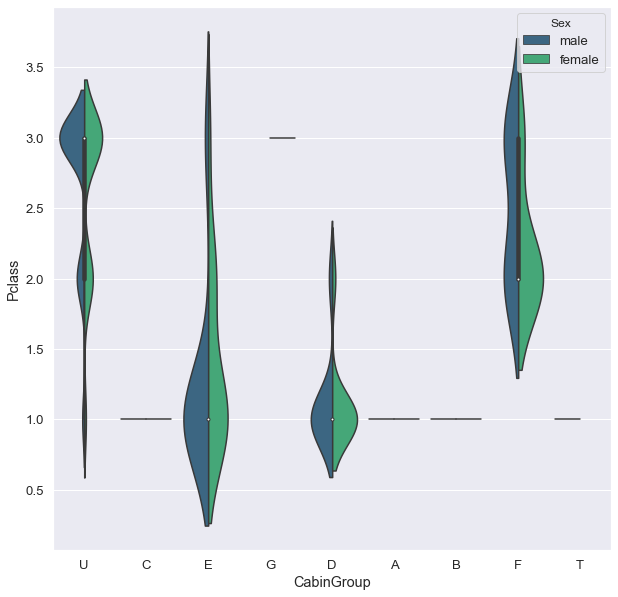

In [214]:
sns.violinplot(y="Pclass", x="CabinGroup", data=df_train, hue='Sex', split=True, palette='viridis')
#pclass=1 was mostly from E,D cabins 
#PCLASS=2 was mostly from cabin F 
#Pclass=3 was mostly of unknown cabin
#C,,A,B,T WAS FOR PCLASS=1 (HIGHER RANK PEOPLE)

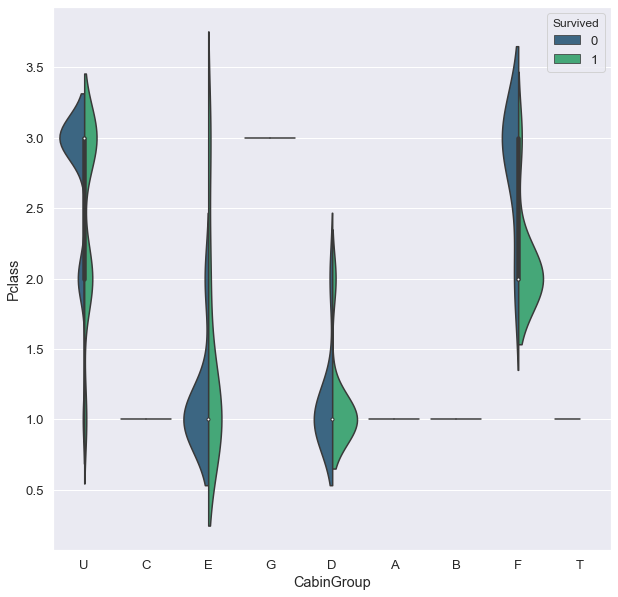

In [215]:
sns.violinplot(y="Pclass", x="CabinGroup", data=df_train, hue='Survived', split=True, palette='viridis')
#Pclass=2 & cabin = F many was survived other pclass=2 was very few and survived with small percentage 
#PCLASS=3 NOT VERY MUCH WAS SURVIVED 
#PCLASS=1,2 MANY WAS SUVIRVED 

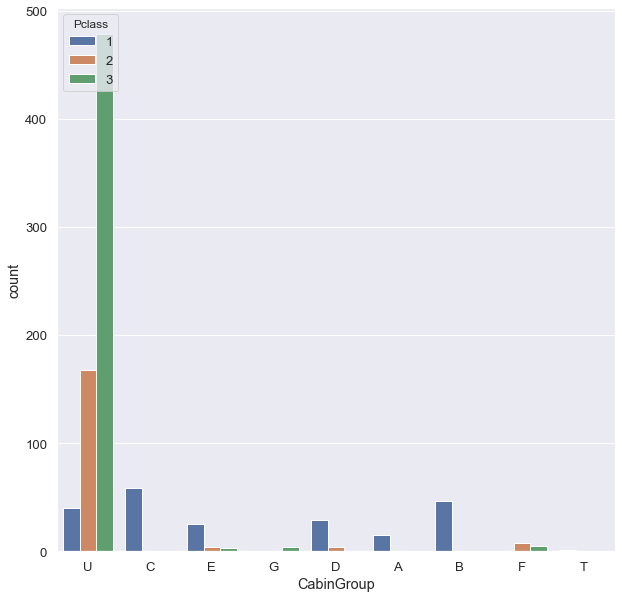

In [217]:
sns.countplot(hue='Pclass',x='CabinGroup' ,data=df_train)
#This emphasis & adds some information of the previous graph
#C,A,B had only pclass = 1 
#E,D,F were mixed of multiple classes . 
#we may have an observation that people of A,B,C should have survived more than other cabins people 

In [222]:
def bar_chart(feature):
    survived = df_train[df_train['Survived']==1][feature].value_counts()
    dead = df_train[df_train['Survived']==0][feature].value_counts()
    df_t = pd.DataFrame([survived,dead])
    df_t.index = ['Survived','Dead']
    df_t.plot(kind='bar',stacked=True, figsize=(10,5))

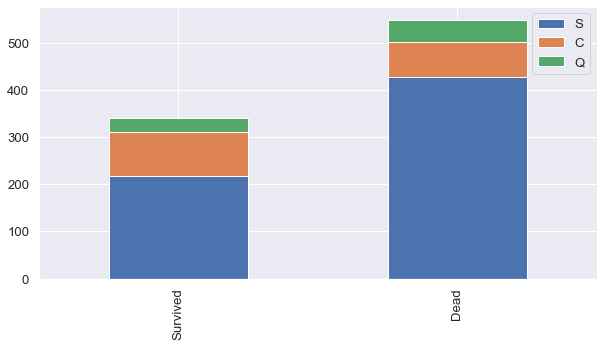

In [226]:
bar_chart('Embarked')

# Data preprocessing

In [ ]:
#Feature engineering : 
#Create a column called Family , add sb&parch
df_train['Family'] = df_train['Parch']+df['SibSp']

#Change Survived into Y & N 
df_train['Survived'] = df_train['Survived'].replace([0,1],['N','Y'])


#Convert Sex into 0,1 
df_train['Sex'] = df_train['Sex'].replace(['male','female'],[0,1])



In [234]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rank,CabinGroup,Family
0,1,N,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,U,1
1,2,Y,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,C,1
2,3,Y,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,U,0
3,4,Y,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,C,1
4,5,N,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,U,0


In [ ]:
#remove unNeeded columns 

#Cabin => Replaced by cabinGroup or deck..
#Name =>Replaced by Rank
#Ticket => no need 
#Fare => No need (maybe further explored if i get low accuracy )
#SibSP =>Replaced by Family
#Parch => Replaced by Family 
#PassengerId => No need for now 
df_train.drop('Name',axis=1,inplace=True)
df_train.drop('Cabin',axis=1,inplace=True)
df_train.drop('Ticket',axis=1,inplace=True)
df_train.drop('Parch',axis=1,inplace=True)
df_train.drop('SibSp',axis=1,inplace=True)
df_train.drop('Fare',axis=1,inplace=True)
df_train.drop('PassengerId',axis=1,inplace=True)


In [261]:
#fill missing data with mean for age and mode for embraked 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') 
df_train['Age'] = imputer.fit_transform(df_train[['Age']])

imputer = SimpleImputer(strategy='most_frequent') 
df_train['Embarked'] = imputer.fit_transform(df_train[['Embarked']])



In [ ]:
#imputing missing data values with median

In [262]:
#Imputing outliers with the mean/median ... 
subColumns = ['Age']

#Checking count of outlier manually, I will be updating them later on inshAllah but just to have a view.
for col in df_train[subColumns]:
    outliers_indices = ds.structdata.detect_outliers(df, 0, [col])
    print(f'in col: {col} , there is about {len(outliers_indices)} outliers.... imputing by median\n')
    col_median = df[col].median()
    df[col].iloc[outliers_indices] = col_median
    


in col: Age , there is about 94 outliers.... imputing by median



/Users/mac/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [267]:
df_train.isnull().sum() #no NULL  

Survived      0
Pclass        0
Sex           0
Age           0
Embarked      0
Rank          0
CabinGroup    0
Family        0
dtype: int64

In [268]:
df_train.head()

,Survived,Pclass,Sex,Age,Embarked,Rank,CabinGroup,Family
0,N,3,0,22.0,S,0,U,1
1,Y,1,1,38.0,C,1,C,1
2,Y,3,1,26.0,S,2,U,0
3,Y,1,1,35.0,S,1,C,1
4,N,3,0,35.0,S,0,U,0


In [269]:
#Get dummies for CABINGROUP,EMBARKED
df_train = pd.get_dummies(df_train, columns=['Rank','CabinGroup','Pclass','Sex','Embarked'], drop_first=True)

In [270]:
df_train.head()

,Survived,Age,Embarked,Family,Rank_1,Rank_2,Rank_3,CabinGroup_B,CabinGroup_C,CabinGroup_D,CabinGroup_E,CabinGroup_F,CabinGroup_G,CabinGroup_T,CabinGroup_U,Pclass_2,Pclass_3,Sex_1
0,N,22.0,S,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,Y,38.0,C,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,Y,26.0,S,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
3,Y,35.0,S,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,N,35.0,S,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [271]:
#Split data 

In [279]:
x=df_train.drop('Survived',axis=1) #get all features expect IFT
y = df_train['Survived']  # get only IFT 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=1) #splitting data into 80/20

In [ ]:
#Scalling the data .... Let's try without 

In [280]:
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [281]:
model.score(x_train, y_train)  #0.97 accuracy on training

0.9737827715355806

In [282]:
model.score(x_test, y_test)  #0.79 accuracy on test data 

0.7916666666666666

In [283]:
model = XGBClassifier(n_estimators=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [285]:
model.score(x_test, y_test)  #0.79 accuracy on test data 

0.7964743589743589

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [334]:
classfiers=["RandomForestClassifier","XGBClassifier","LogisticRegression","SVC"]
models=[RandomForestClassifier(n_estimators=200),XGBClassifier(n_estimators=200),LogisticRegression(),SVC()]
res = {classfiers[i]: models[i] for i in range(len(models))} 

import csv
with open('accuracyTable.csv', mode='w') as accuracy_file:
    accuracy_writer = csv.writer(accuracy_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    accuracy_writer.writerow(["Classfier","Score"])
    for record in res :
        model=res.get(record)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy_writer.writerow([record,model.score(x_test, y_test)])
        #employee_file.predict (f'Model={record} Accuracy= {model.score(x_test, y_test)}')


/Users/mac/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [335]:
myAccuracy = pd.read_csv('accuracyTable.csv')
myAccuracy.head(5)

,Classfier,Score
0,RandomForestClassifier,0.791667
1,XGBClassifier,0.796474
2,LogisticRegression,0.822115
3,SVC,0.596154


In [336]:
#Exporting model 
import joblib

In [341]:
#I will export logistic regression since it resulted in the highest accuracy ...
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test,y_test)

0.7916666666666666

In [342]:
joblib.dump(model,"model.pkl")

['model.pkl']

In [348]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 862 to 458
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           624 non-null    float64
 1   Family        624 non-null    int64  
 2   Rank_1        624 non-null    uint8  
 3   Rank_2        624 non-null    uint8  
 4   Rank_3        624 non-null    uint8  
 5   CabinGroup_B  624 non-null    uint8  
 6   CabinGroup_C  624 non-null    uint8  
 7   CabinGroup_D  624 non-null    uint8  
 8   CabinGroup_E  624 non-null    uint8  
 9   CabinGroup_F  624 non-null    uint8  
 10  CabinGroup_G  624 non-null    uint8  
 11  CabinGroup_T  624 non-null    uint8  
 12  CabinGroup_U  624 non-null    uint8  
 13  Pclass_2      624 non-null    uint8  
 14  Pclass_3      624 non-null    uint8  
 15  Sex_1         624 non-null    uint8  
 16  Embarked_Q    624 non-null    uint8  
 17  Embarked_S    624 non-null    uint8  
dtypes: float64(1), int64(1), uin